# Simple data exploration 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("../input/porto-seguro-safe-driver-prediction/train.csv")
test = pd.read_csv("../input/porto-seguro-safe-driver-prediction/test.csv")

print('Train data: ', train.shape)
print('Test data: ', test.shape)

Train data:  (595212, 59)
Test data:  (892816, 58)


## 1. Target distribution
 + Target(0, 1)을 확인했을 때, 클래스 비율이 매우 불균형함을 알 수 있다. -> Highly imbalanced
 + Class 0: 운전자가 insurance claim을 걸지 않음
 + Class 1: 운전자가 insurance claim을 걸음

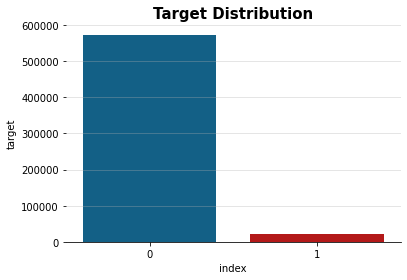

In [3]:
targets = pd.DataFrame(train['target'].value_counts().reset_index())
targets['prop'] = targets['target']/train.shape[0]

plt.figure(figsize = (6, 4))
ax = plt.subplot(1, 1, 1)
sns.barplot(targets['index'], targets['target'], palette = ['#006699', '#cc0000'])
for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.title('Target Distribution', fontweight = 'bold', fontsize = 15)
plt.show()

## 2. Features

### (1) Categorical variables
+ 범주형 변수 중 binary 변수가 가장 많다.
+ 범주가 지나치게 많은 변수들에 대한 encoding 기법을 고민해봐야 할 필요성이 있다.

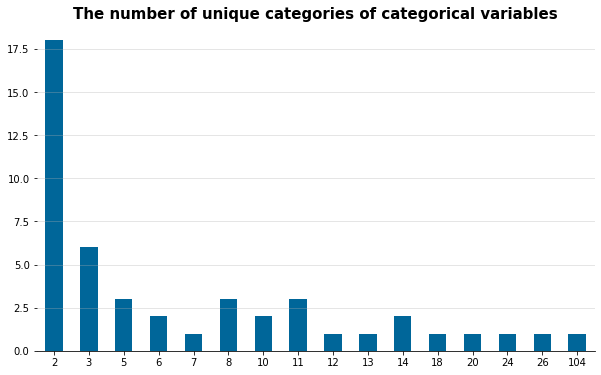

In [4]:
int_vars = train.drop(['id', 'target'], axis = 1)
ax = int_vars.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color='#006699', figsize=(10,6))
for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4)
plt.xticks(rotation = 0)
plt.title('The number of unique categories of categorical variables', fontweight = 'bold', fontsize = 15)
plt.show()

### (2) Continuous variables
+ Target 별로 연속형 변수들의 분포를 그렸을 때, 분포의 차이가 크지 않음을 확인할 수 있다.

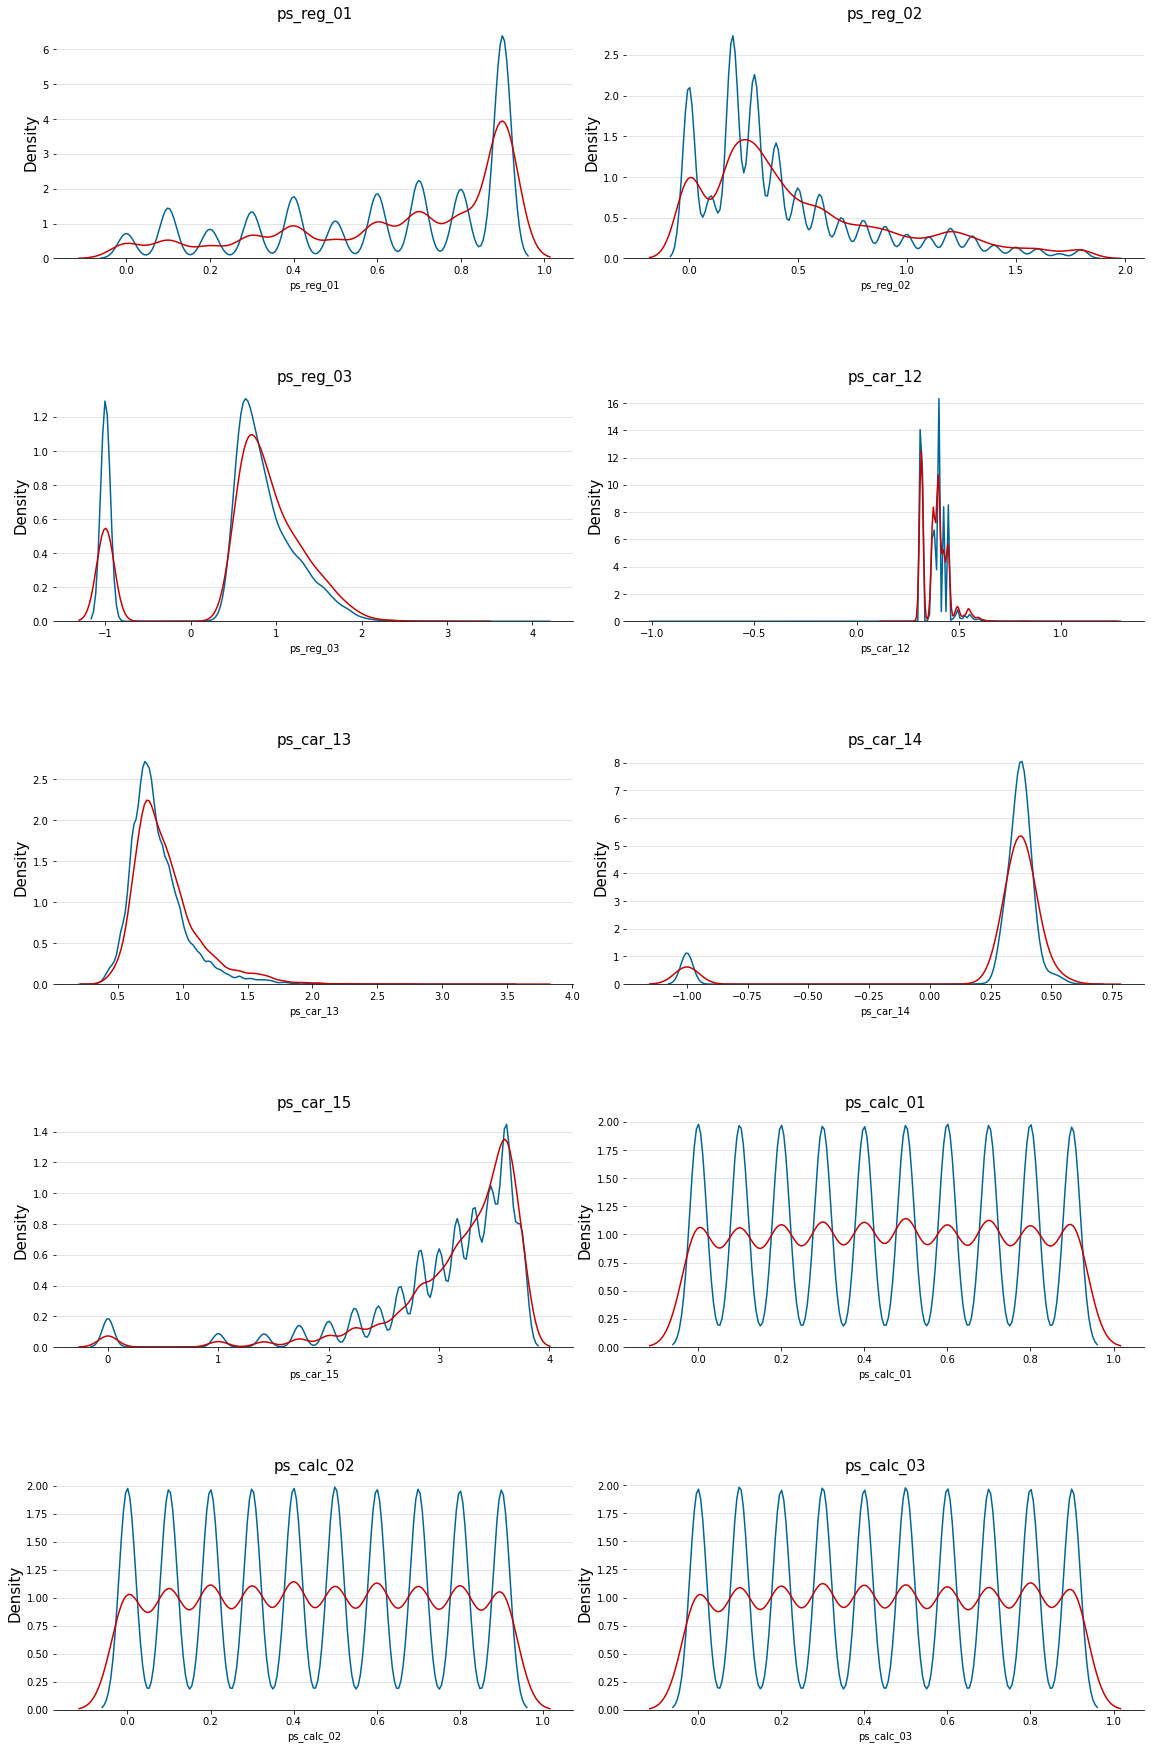

In [5]:
plt.figure(figsize = (16,12))

colors = OrderedDict({0:'#006699',1:'#cc0000'})
target_map = OrderedDict({0:'not claimed',1:'claimed'})

for i,col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(5,2,i+1)
    for standard,color in colors.items():
        sns.kdeplot(train.loc[train['target'] == standard,col].dropna(),
                   ax = ax, color = color, label = target_map[standard])
        for s in ["top","right","left"]:
            ax.spines[s].set_visible(False)
        ax.grid(axis='y', linestyle='-', alpha=0.4)
    plt.title(f'{col}', fontsize = 15);
    plt.ylabel('Density', fontsize = 15)
    plt.tight_layout()
plt.subplots_adjust(top=2)

## 3. Missing values
+ Missing 비율이 40~50% 이상인 변수는 제거하거나, 다른 값으로 대체하기도 한다.

In [6]:
train = train.replace(-1, np.nan)
na_count = train.isna().sum().sort_values(ascending = False).reset_index()
na_count.rename(columns = {'index':'variable', 0: 'count'}, inplace = True)
na_count['prop'] = na_count['count']/train.shape[0]
na_count

,variable,count,prop
0,ps_car_03_cat,411231,0.690898
1,ps_car_05_cat,266551,0.447825
2,ps_reg_03,107772,0.181065
3,ps_car_14,42620,0.071605
4,ps_car_07_cat,11489,0.019302
5,ps_ind_05_cat,5809,0.009760
6,ps_car_09_cat,569,0.000956
7,ps_ind_02_cat,216,0.000363
8,ps_car_01_cat,107,0.000180
9,ps_ind_04_cat,83,0.000139
